### Packages

In [4]:
# Import packages

# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import Data

In [5]:
df = pd.read_excel("Data_sample_(5).xlsx", usecols=range(19))
df.head()

,id,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Count,Total Time
0,53134335.0,DeliveredStatus,85260.0,18579597.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,6.029,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,NaN,55
1,53009545.0,DeliveredStatus,23517.0,11871195.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,3.998,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,NaN,36
2,53129297.0,DeliveredStatus,18300.0,1053786.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,5.309,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,NaN,44
3,53235752.0,CanceledStatus,85260.0,20466508.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,6.429,2019-07-13 21:55:58,2019-07-13 22:24:58,2019-07-13 22:24:58,NaT,NaT,NaT,2019-07-13 22:25:15,NaN,29
4,53002671.0,DeliveredStatus,15912.0,16549489.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,3.442,2019-07-12 19:40:13,2019-07-12 19:41:14,2019-07-12 19:42:34,2019-07-12 19:46:28,2019-07-12 19:56:59,2019-07-12 20:07:08,2019-07-12 20:10:37,NaN,30


### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        2471 non-null   float64       
 1   final_status                              2471 non-null   object        
 2   store_address_id                          2440 non-null   float64       
 3   customer_id                               2471 non-null   float64       
 4   courier_id                                2471 non-null   float64       
 5   vertical                                  2471 non-null   object        
 6   is_food                                   2471 non-null   float64       
 7   transport                                 2471 non-null   object        
 8   number_of_assignments                     2471 non-null   float64       
 9   total_real_distance           

In [7]:
# Convert is_food to bool
df.is_food.replace({1: True, 0: False}, inplace=True)

In [8]:
# Drop empty Count column
df.drop(columns="Count", inplace=True)

In [9]:
# Drop useless id column
df.drop(columns="id", inplace=True)

In [11]:
# Total Time seems to have errors, we drop it as we can calculate the total time by subtraction if needed
display(df[df["Total Time"]==0].head())
df.drop(columns="Total Time", inplace=True)

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Total Time
93,DeliveredStatus,18300.0,5532020.0,14917583.0,WALL - Partner,True,BICYCLE,2.0,4.871,2019-07-08 22:19:29,2019-07-08 23:01:58,2019-07-08 23:01:58,2019-07-08 22:21:41,2019-07-08 23:13:15,2019-07-08 23:18:01,2019-07-08 23:20:06,0
420,DeliveredStatus,18300.0,6699749.0,11951777.0,WALL - Partner,True,BICYCLE,1.0,3.121,2019-07-09 20:48:27,2019-07-09 20:58:50,2019-07-09 20:59:14,2019-07-09 20:48:37,2019-07-09 21:40:42,2019-07-09 21:44:46,2019-07-09 21:48:29,0
766,DeliveredStatus,15910.0,18189758.0,16974425.0,WALL - Partner,True,BICYCLE,1.0,3.989,2019-07-10 19:44:28,2019-07-10 19:54:51,2019-07-10 20:06:58,2019-07-10 20:14:31,2019-07-10 20:24:56,2019-07-10 20:41:05,2019-07-10 20:45:25,0
857,DeliveredStatus,18300.0,17160338.0,9128251.0,WALL - Partner,True,MOTORBIKE,2.0,2.700,2019-07-12 14:43:14,2019-07-12 15:21:53,2019-07-12 15:22:18,2019-07-12 15:27:50,2019-07-12 15:33:58,2019-07-12 15:39:02,2019-07-12 15:43:37,0
966,DeliveredStatus,18300.0,8640677.0,14306599.0,WALL - Partner,True,CAR,1.0,7.138,2019-07-13 22:16:22,2019-07-13 22:37:35,2019-07-13 22:38:00,2019-07-13 22:48:00,2019-07-13 22:56:00,2019-07-13 23:10:00,2019-07-13 23:16:52,0


In [12]:
# Drop rows with all na
df.dropna(thresh=6, inplace=True)

In [13]:
# All missing store_adress_id belong to the QUIERO. Which makes sense. COURIER is probably a mistake?
print(df[df.store_address_id.isna()].vertical.value_counts())
print(len(df[df.vertical=="QUIERO"]))

QUIERO     30
COURIER     1
Name: vertical, dtype: int64
30


In [14]:
# All missing time values come from canceled orders. 
# Since we don't need to apply machine learning techniques, the best is to leave all missing values as nan.
df[df.final_status=="CanceledStatus"].isna().sum()

final_status                                 0
store_address_id                            11
customer_id                                  0
courier_id                                   0
vertical                                     0
is_food                                      0
transport                                    0
number_of_assignments                        0
total_real_distance                          0
activation_time_local                        0
last_courier_assigned_time                   0
courier_started_order_local                  0
courier_enters_pickup_time_local            61
pickup_time_local                           61
courier_enters_delivery_point_time_local    67
termination_time                             0
dtype: int64

In [19]:
# Clean dataset
df.head(3)

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time
0,DeliveredStatus,85260.0,18579597.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,6.029,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49
1,DeliveredStatus,23517.0,11871195.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,3.998,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01
2,DeliveredStatus,18300.0,1053786.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,5.309,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23


### Feature Engineering

In [20]:
# is_canceled_status: bool variable from final_status
df["is_canceled_status"] = df.final_status.replace({"DeliveredStatus": 0, "CanceledStatus": 1})

In [21]:
# is_reassigned: bool variable for reassigned orders
df["is_reassigned"] = df.number_of_assignments > 1

In [22]:
# total_time: time elapsed between placing an order and final delivery
total_time = df.termination_time - df.activation_time_local
df["total_time"] = total_time.astype("timedelta64[s]") / 60

In [23]:
# waiting_time_at_pickup: couriers' idle time waiting to pickup
waiting_time_at_pickup = df.pickup_time_local - df.courier_enters_pickup_time_local
df["waiting_time_at_pickup"] = waiting_time_at_pickup.astype("timedelta64[s]") / 60

In [24]:
# courier_travel_time: time courier spends traveling
courier_total_time = df.courier_enters_delivery_point_time_local - df[["last_courier_assigned_time",
                        "courier_started_order_local", "courier_enters_pickup_time_local"]].min(axis=1) # had to pick the min of the values to avoid errors when couriers forget to start the order
df["courier_travel_time"] = courier_total_time.astype("timedelta64[s]") / 60 - df.waiting_time_at_pickup

In [25]:
# courier_speed: speed of courier in km/min
df["courier_speed"] = df.total_real_distance / df.courier_travel_time

In [26]:
# Final working dataset
df.head(3)

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,...,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,is_canceled_status,is_reassigned,total_time,waiting_time_at_pickup,courier_travel_time,courier_speed
0,DeliveredStatus,85260.0,18579597.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,6.029,2019-07-13 13:04:44,...,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,0,False,55.083333,19.533333,21.90,0.275297
1,DeliveredStatus,23517.0,11871195.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,3.998,2019-07-12 20:06:29,...,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,0,False,36.533333,7.033333,20.15,0.198412
2,DeliveredStatus,18300.0,1053786.0,20153483.0,WALL - Partner,True,BICYCLE,1.0,5.309,2019-07-13 12:14:58,...,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,0,False,44.416667,4.883333,34.65,0.153218


### Exploratory Data Analysis (Common Questions Only)

1. Based on the data you were given, provide visibility over the following metrics:
- Customer Delivery Time. How long the customer waited for the order.

Average customer delivery time: 38.0 min


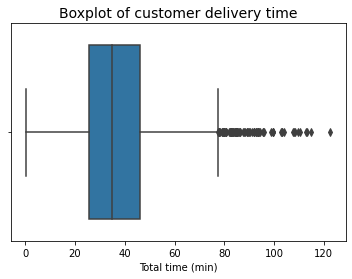

In [89]:
# On average customers get their order in 38 minutes. While around 75% of orders are delivered within 45 minuts,
# we can see the presence of some extreme outliers, with delivery times of over 80 minuts.
print(f"Average customer delivery time: {round(df.total_time.mean(), 1)} min")
sns.boxplot(df.total_time)
plt.title("Boxplot of customer delivery time", size=14)
plt.xlabel("Total time (min)")
plt.show()

- Delivery Distance. Total distance traveled by the couriers.

Average delivery distance: 5.05 km


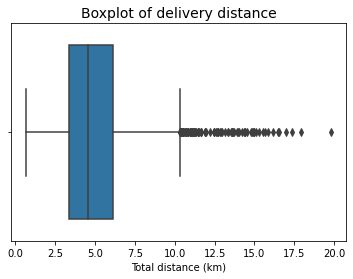

In [87]:
# On average drivers travel around 5 km to deliver an order. 95% of drivers travel 10 km or less.
print(f"Average delivery distance: {round(df.total_real_distance.mean(), 2)} km")
sns.boxplot(df.total_real_distance)
plt.title("Boxplot of delivery distance", size=14)
plt.xlabel("Total distance (km)")
plt.show()

- Reassignment Probability (whenever we need to assign an order to
another courier after the first assignment it counts as a reassignment).

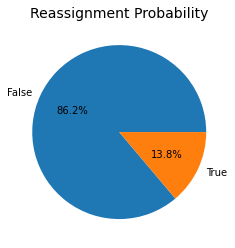

In [74]:
# 13% of orders are reassigned at least once
is_reassigned_proportion = df.is_reassigned.value_counts(normalize=True)
plt.pie(is_reassigned_proportion, labels=is_reassigned_proportion.index, autopct='%.1f%%')
plt.title("Reassignment Probability", size = 14)
plt.show()

2. Regarding reassignments can you see any trends / correlation between this
metric and any of the dimensions in the dataset?

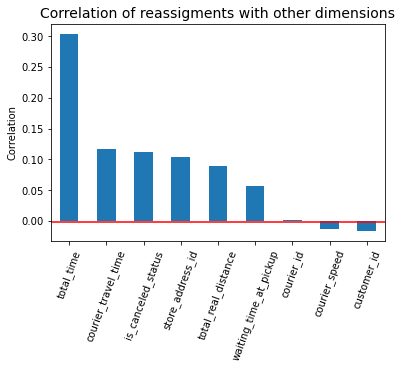

In [102]:
# For the numerical values, the number of assigments seem to correlate with longer delivery times and distances, 
# and canceled orders. 
df.corr().number_of_assignments.sort_values(ascending=False)[2:].plot(kind="bar")
plt.title("Correlation of reassigments with other dimensions", size=14)
plt.ylabel("Correlation")
plt.axhline(y=-0.001, color='r', linestyle='-')
plt.xticks(rotation=70)
plt.show()

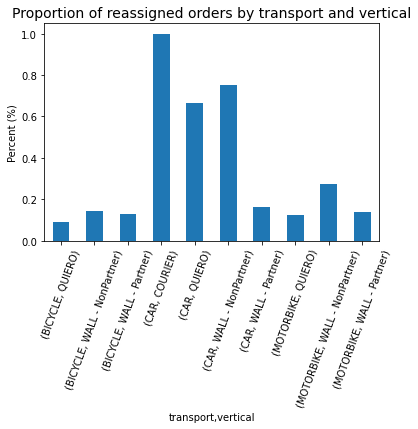

In [120]:
# Looking at the categorical values, we see that reasigned orders tend to be accepted mostly by cars, especially those
# orders from the QUIERO and NonPartner verticals. 
# Seems to indicate that some of these custom orders are not maneagable by bikes or bicycles. 
df.groupby(["transport", "vertical"]).is_reassigned.mean().plot(kind="bar")
plt.title("Proportion of reassigned orders by transport and vertical", size=14)
plt.ylabel("Percent (%)")
plt.xticks(rotation=70)
plt.show()

3. Once the courier arrives at the store, the time until the order is picked-up
(waiting_time_at_pickup), can present high variation. With the data given,
present an analysis showcasing this. Can you identify any clear trends in terms
of worst offenders? What could be the possible causes when the courier is
waiting for a very long time before picking up the order?

In [54]:
# 2 errors with negative waiting time.
# We replace negative waiting time with 0.
print((df.waiting_time_at_pickup<0).sum())
df.loc[df.waiting_time_at_pickup < 0, "waiting_time_at_pickup"] = 0

2


Average waiting time at pickup: 15.2 min


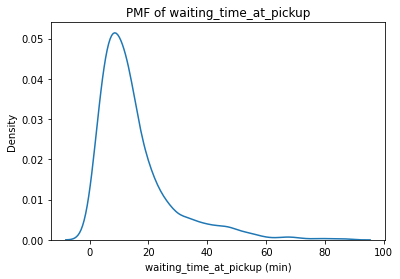

In [110]:
# On average couriers wait for 15 minutes at the store for pickup.
print(f"Average waiting time at pickup: {round(df.waiting_time_at_pickup.mean(), 1)} min")
# There is a large variance and some orders take a very long waiting_time_at_pickup.
sns.kdeplot(df.waiting_time_at_pickup)
plt.title("PMF of waiting_time_at_pickup")
plt.xlabel("waiting_time_at_pickup (min)")
plt.show()

In [56]:
# These are the stores with at least 5 orders with the highest average waiting time
waiting_time_by_store = df.groupby("store_address_id").waiting_time_at_pickup.agg(["mean", "count"])
waiting_time_by_store[waiting_time_by_store["count"]>=5].sort_values(by="mean", ascending=False).head()

,mean,count
store_address_id,,
82665.0,20.869231,13
15910.0,20.415064,52
74656.0,20.058333,6
30640.0,19.722148,149
18300.0,19.103596,964


In [57]:
# Couriers with at least 5 orders with the highest average waiting time
waiting_time_by_courier = df.groupby("courier_id").waiting_time_at_pickup.agg(["mean", "count"])
waiting_time_by_courier[waiting_time_by_courier["count"]>=5].sort_values(by="mean", ascending=False).head()

,mean,count
courier_id,,
7290210.0,24.511111,18
8316271.0,24.346667,10
13822458.0,23.596296,9
18225711.0,23.594298,38
17436695.0,23.000000,7


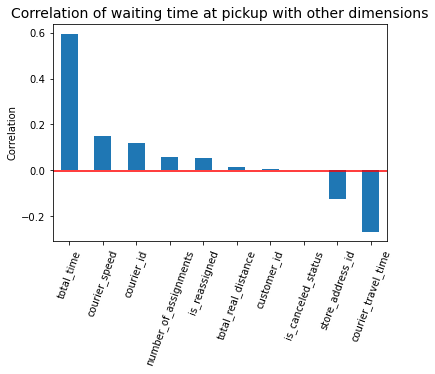

In [125]:
# The waiting time at pickup is highly correlated to total_time (as expected), 
# and also negatively correlated with courier_travel_time, less travel means reaching 
# the store earlier and thus waiting more.
df.corr().waiting_time_at_pickup.sort_values(ascending=False)[1:].plot(kind="bar")
plt.title("Correlation of waiting time at pickup with other dimensions", size=14)
plt.ylabel("Correlation")
plt.axhline(y=-0.001, color='r', linestyle='-')
plt.xticks(rotation=70)
plt.show()

In [121]:
# The most extreme outliers in waiting_time_at_pickup are due to some couriers not confirming the pickup when 
# they pickup the order at the restaurant. 
# Below are some cases where this happens. We can find them by looking at the the speed of the couriers. Speeds that
# are unrealistically fast are due to this fact.
df.sort_values(by="courier_speed", ascending=False).head()

,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,...,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,is_canceled_status,is_reassigned,total_time,waiting_time_at_pickup,courier_travel_time,courier_speed
2056,DeliveredStatus,18300.0,16552619.0,16974422.0,WALL - Partner,True,BICYCLE,1.0,5.412,2019-07-09 21:02:12,...,2019-07-09 21:02:12,2019-07-09 22:10:04,2019-07-09 22:10:10,2019-07-09 22:10:15,0,False,68.050000,67.866667,0.100000,54.120000
2204,DeliveredStatus,18300.0,20416485.0,9558769.0,WALL - Partner,True,MOTORBIKE,1.0,5.084,2019-07-10 20:18:11,...,2019-07-10 20:36:42,2019-07-10 21:23:08,2019-07-10 21:23:18,2019-07-10 21:23:28,0,False,65.283333,46.433333,0.166667,30.504000
91,DeliveredStatus,18300.0,5389187.0,14917583.0,WALL - Partner,True,BICYCLE,1.0,3.327,2019-07-08 14:33:10,...,2019-07-08 14:33:17,2019-07-08 14:46:12,2019-07-08 14:46:20,2019-07-08 14:46:28,0,False,13.300000,12.916667,0.133333,24.952500
2427,DeliveredStatus,18300.0,12535717.0,15058366.0,WALL - Partner,True,BICYCLE,1.0,4.423,2019-07-08 19:52:43,...,2019-07-08 19:52:54,2019-07-08 20:11:11,2019-07-08 20:11:23,2019-07-08 20:13:29,0,False,20.766667,18.283333,0.200000,22.115000
2098,DeliveredStatus,18300.0,3939091.0,2234219.0,WALL - Partner,True,MOTORBIKE,2.0,3.830,2019-07-14 21:24:36,...,2019-07-14 21:41:39,2019-07-14 21:41:39,2019-07-14 21:42:20,2019-07-14 21:43:00,0,True,18.400000,0.000000,0.683333,5.604878


In [113]:
# we set an arbitrary realistic speed threshold at 1 km / min. 
# These are the couriers ids that have reported an unrealistic speed more than 4 times. We could send them a 
# remainder that they need to confirm the order and the pickup from the store.
unrealistic_speed_by_courier = df[df.courier_speed>1].courier_id.value_counts()
unrealistic_speed_by_courier[unrealistic_speed_by_courier>3]

14917583.0    11
18225711.0     6
14547214.0     5
4055620.0      4
15239373.0     4
18225713.0     4
Name: courier_id, dtype: int64